In [64]:
##importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [83]:
##loading dataset
df = pd.read_csv("car_data.csv")

In [84]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
##checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## There are no null values in our dataset

In [8]:
## Numerical Columns
num_columns = [fea for fea in df.columns if df[fea].dtype != 'O']

In [9]:
num_columns

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [10]:
##categorical Columns
cat_columns = [fea for fea in df.columns if df[fea].dtype == 'O']

In [11]:
cat_columns

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [14]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


## Dropping Car Name Column As IT is not useful for us

In [17]:
df = df.drop(['Car_Name'],axis = 1)

In [18]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


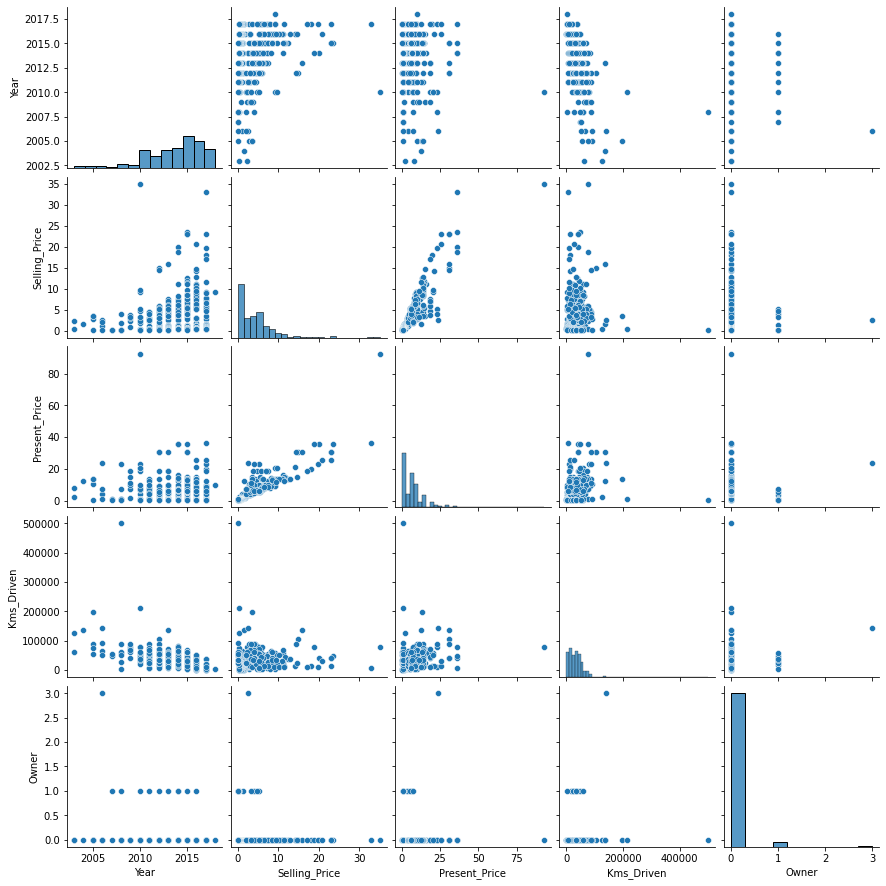

In [20]:
sns.pairplot(df)

In [21]:
num_columns

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

## checking for outliers

<AxesSubplot: >

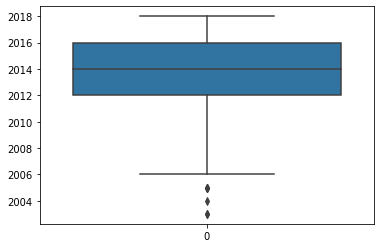

In [25]:
sns.boxplot(df['Year'])


<AxesSubplot: >

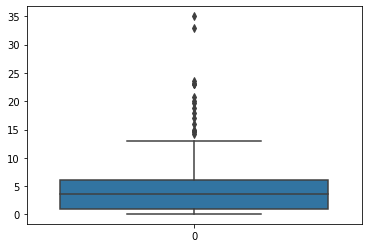

In [26]:
sns.boxplot(df['Selling_Price'])

<AxesSubplot: >

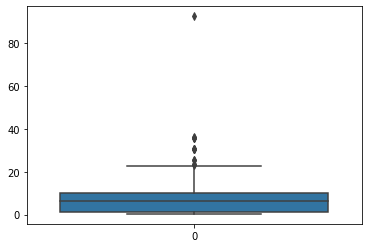

In [27]:
sns.boxplot(df['Present_Price'])

<AxesSubplot: >

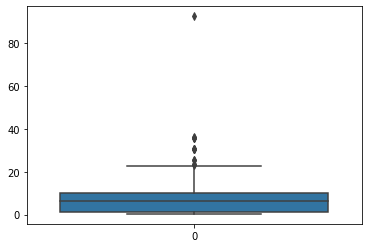

In [28]:
sns.boxplot(df['Present_Price'])

<AxesSubplot: >

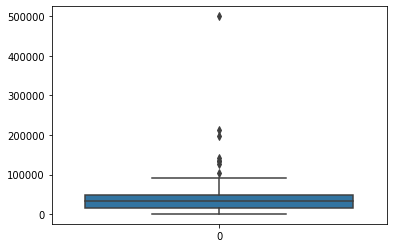

In [29]:
sns.boxplot(df['Kms_Driven'])

<AxesSubplot: >

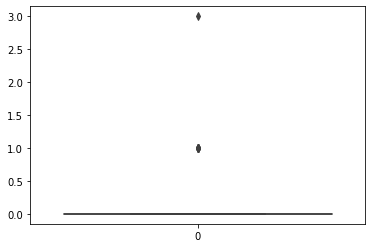

In [30]:
sns.boxplot(df['Owner'])

In [36]:
df.shape

(301, 8)

## Removing Outliers using IQR Method

In [39]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df2 = df[~((df< (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18884\3754090595.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df[~((df< (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [40]:
df2

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


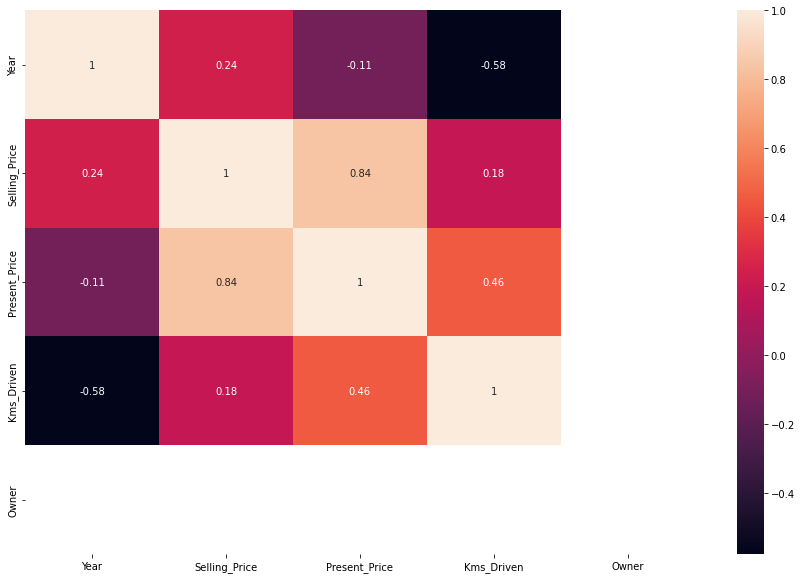

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot = True)
plt.show()
            

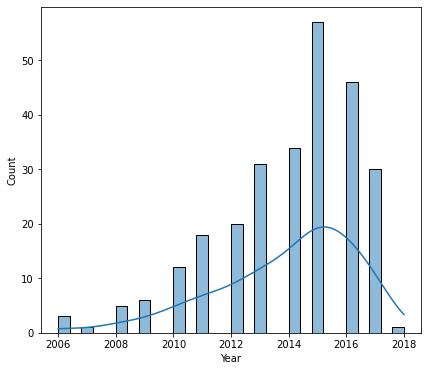

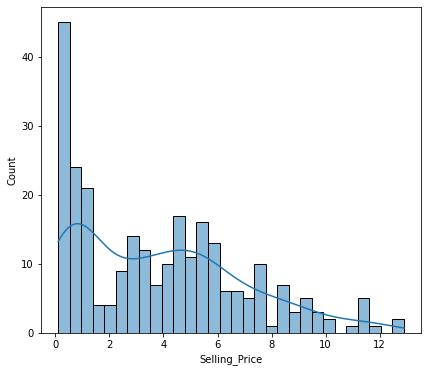

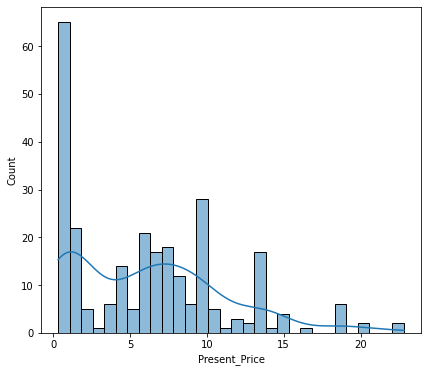

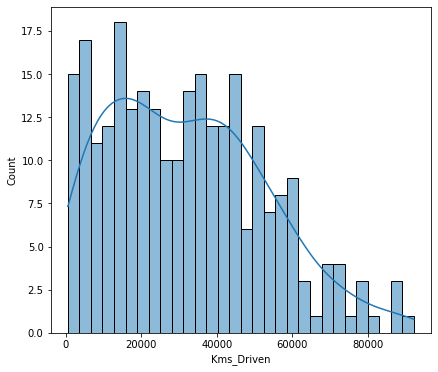

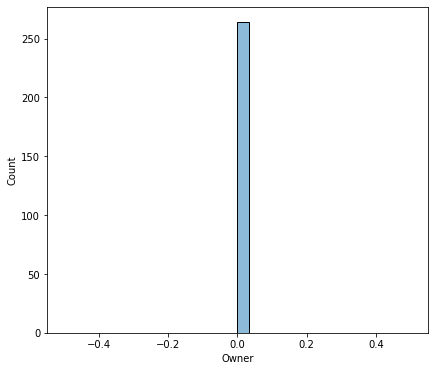

In [42]:
for i in num_columns:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=df2,x=i,kde = True,bins=30)
    plt.show()

In [43]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Splitting Independent and Dependent Festures

In [85]:
X = df2.drop(['Selling_Price'],axis=1)

In [86]:
y = df2['Selling_Price']

In [46]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 264, dtype: float64

## splitting dataset into training and tesing data set

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
cat_columns

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [56]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [66]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
170,2012,0.83,5500,Petrol,Individual,Manual,0
98,2013,18.61,45000,Petrol,Dealer,Manual,0
103,2017,1.60,1200,Petrol,Individual,Manual,0
289,2016,13.60,10980,Petrol,Dealer,Manual,0
218,2014,9.40,45078,Petrol,Dealer,Manual,0


## We Have Only Nominal Categorical Data So we Will Encode using OHE

In [100]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
from sklearn.compose import ColumnTransformer

In [102]:
transformer_1 = ColumnTransformer(transformers=[
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[3,4,5])
],remainder='passthrough')

In [103]:
from sklearn.pipeline import Pipeline,make_pipeline

## Train The Model

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
transformer_2 = RandomForestRegressor()

## Create Pipeline

In [106]:
pipe = Pipeline([
    ('trf1',transformer_1),
    ('trf2',transformer_2)
])

## Train

In [72]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [3, 4, 5])])),
                ('trf2', RandomForestRegressor())])

In [74]:
pipe.score(X_train,y_train)

0.9911208136517301

In [73]:
y_pred = pipe.predict(X_test)

## Performance Metrics

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [77]:
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))

Mean Squared Error: 0.352420331320754
Mean Absolute Error: 0.39103396226415066


## R square and adjusted R squarem

In [78]:
from sklearn.metrics import r2_score
R_score =  r2_score(y_test,y_pred)
print("R Score: ",R_score)

R Score:  0.958101434880966


In [80]:
Adj_r_score = 1 - (1-R_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1])

In [81]:
print("ad_r_Score: ",Adj_r_score)

ad_r_Score:  0.9526364046480486


## With PCA

In [109]:
dff =  pd.read_csv("car_data.csv")

In [110]:
dff=dff.drop(['Car_Name'],axis = 1)

In [111]:
Q1 = dff.quantile(0.25)
Q3 = dff.quantile(0.75)
IQR = Q3 - Q1
dff2 = dff[~((dff< (Q1 - 1.5 * IQR)) | (dff > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18884\242368263.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dff2 = dff[~((dff< (Q1 - 1.5 * IQR)) | (dff > (Q3 + 1.5 * IQR))).any(axis=1)]


In [112]:
X1 = dff2.drop(['Selling_Price'],axis=1)

In [113]:
y1 = dff2['Selling_Price']

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [116]:
from sklearn.preprocessing import OneHotEncoder

In [117]:
from sklearn.compose import ColumnTransformer

In [118]:
transformer_1 = ColumnTransformer(transformers=[
    ('tnf',OneHotEncoder(sparse=False,drop='first'),[3,4,5])
],remainder='passthrough')

In [119]:
from sklearn.pipeline import Pipeline,make_pipeline

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
transformer_2 = RandomForestRegressor()

In [122]:
pipe = Pipeline([
    ('trf1',transformer_1),
    ('trf2',transformer_2)
])

In [123]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [3, 4, 5])])),
                ('trf2', RandomForestRegressor())])

In [124]:
y_pred = pipe.predict(X_test)

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [126]:
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))

Mean Squared Error: 0.3212994445283014
Mean Absolute Error: 0.3889660377358487


In [127]:
from sklearn.metrics import r2_score
R_score =  r2_score(y_test,y_pred)
print("R Score: ",R_score)

R Score:  0.9618013363507507


## Acurracy Increased as we applied PCA

## Saving the model

In [131]:
import pickle

In [132]:
pickle.dump(pipe,open('pipe.pkl','wb'))

## a. Current Model is best model according to its perfomance but it has very low data for training so this will not much be effective

## b. Yes We Can deploy this in an production

## c. EDA and Data Preprocessing is the hardest part